### 1. Applying functions to columns

In [57]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [58]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


In [59]:
def cut_off_at_100(x):
    return min(x, 100)

In [60]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100], dtype=int64)

In [61]:
ages.with_column('cut off age' , ages.apply(cut_off_at_100, 'Age'))

Person,Age,cut off age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


In [62]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

In [63]:
cut_off = cut_off_at_100

In [64]:
cut_off

<function __main__.cut_off_at_100(x)>

In [65]:
family_heights = Table().read_table("https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/family_heights.csv")
family_heights

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [66]:
heights = Table().with_columns("Parents Average", (family_heights.column('father') + family_heights.column('mother'))/2, "Child Height", family_heights.column('childHeight'))
heights

Parents Average,Child Height
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


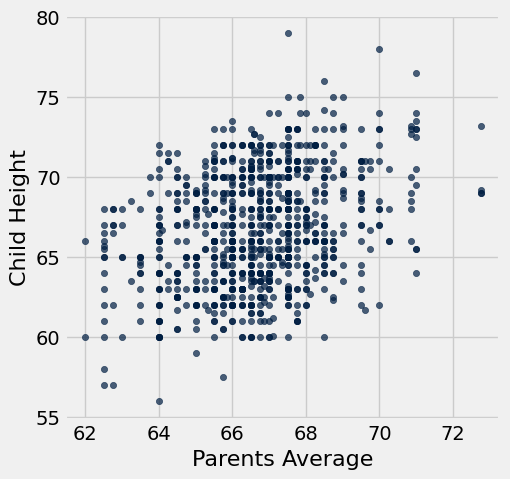

In [67]:
heights.scatter('Parents Average')

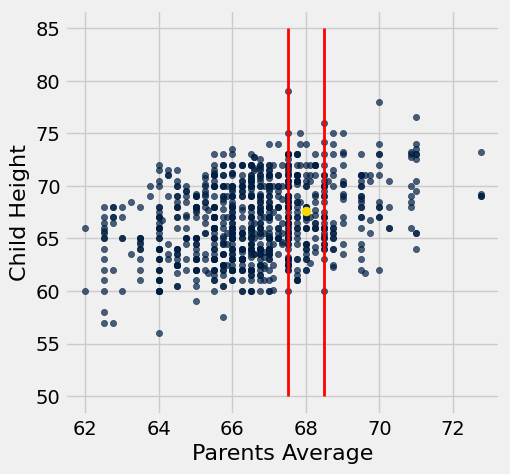

In [68]:
heights.scatter('Parents Average')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 67.62, color='gold', s=40);

In [69]:
close_to_68 = heights.where('Parents Average', are.between(67.5, 68.5))
close_to_68

Parents Average,Child Height
68,74
68,70
68,68
68,67
68,67
68,66
68,63.5
68,63
67.5,65
68.1,62.7


In [70]:
np.average(close_to_68.column('Child Height'))

67.620000000000005

In [71]:
def predict_child_height(p_avg):
    close_point = heights.where('Parents Average', are.between(p_avg-0.5, p_avg+0.5))
    return np.average(close_point.column('Child Height'))

In [72]:
predict_child_height(68)

67.620000000000005

In [73]:
predict_child_height(66)

66.086407766990291

In [74]:
heigts_with_prediction = heights.with_column('Prediction', heights.apply(predict_child_height, 'Parents Average'))
heigts_with_prediction

Parents Average,Child Height,Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158
71,72.5,70.4158
71,65.5,70.4158
71,65.5,70.4158
69.5,71,68.5025
69.5,68,68.5025


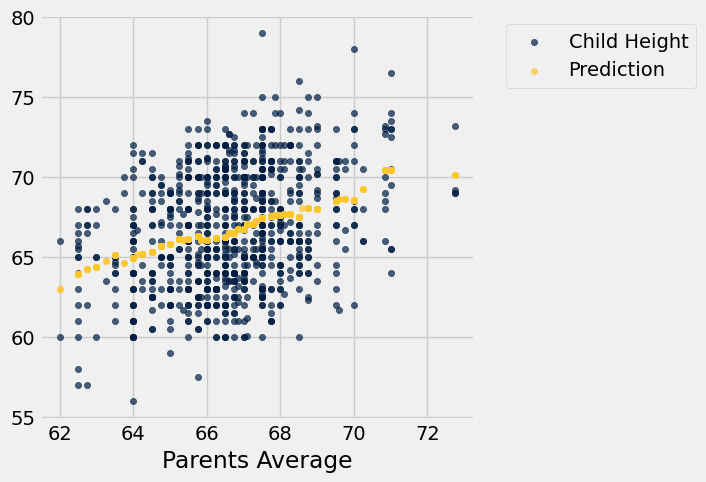

In [75]:
heigts_with_prediction.scatter('Parents Average')

In [76]:
predict_child_height(70)

68.561904761904756

### 2. Classifying by One Variable

In [77]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [78]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [79]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [80]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,16.55
strawberry,8.8


In [82]:
cones.where('Flavor', 'chocolate').column('Price')

array([ 4.75,  6.55,  5.25])

In [83]:
sum(cones.where('Flavor', 'chocolate').column('Price'))

16.550000000000001

In [84]:
# For each distinct value in `Flavor, access all the rows
# and create an array of `Price`

cones_choc = cones.where('Flavor', are.equal_to('chocolate')).column('Price')
cones_strawb = cones.where('Flavor', are.equal_to('strawberry')).column('Price')

# Display the arrays in a table

grouped_cones = Table().with_columns(
    'Flavor', make_array('chocolate', 'strawberry'),
    'Array of All the Prices', make_array(cones_choc, cones_strawb)
)

# Append a column with the sum of the `Price` values in each array

price_totals = grouped_cones.with_column(
    'Sum of the Array', make_array(sum(cones_choc), sum(cones_strawb))
)
price_totals

Flavor,Array of All the Prices,Sum of the Array
chocolate,[ 4.75 6.55 5.25],16.55
strawberry,[ 3.55 5.25],8.8


In [86]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,6.55
strawberry,5.25


In [87]:
prices_max = grouped_cones.with_column("Price Max", make_array(max(cones_choc), max(cones_strawb)))
prices_max

Flavor,Array of All the Prices,Price Max
chocolate,[ 4.75 6.55 5.25],6.55
strawberry,[ 3.55 5.25],5.25


In [89]:
lengths = grouped_cones.with_column("Length of the array", make_array(len(cones_choc), len(cones_strawb)))
lengths

Flavor,Array of All the Prices,Length of the array
chocolate,[ 4.75 6.55 5.25],3
strawberry,[ 3.55 5.25],2


In [90]:
nba1 = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/nba_salaries.csv')
nba = nba1.relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [91]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


In [93]:
nba.group("POSITION")

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [96]:
position_and_money = nba.select("POSITION", "SALARY")
position_and_money.group("POSITION", np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [97]:
nba.group("POSITION", np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


### 3. Cross-Classifying by More than One Variable

In [1]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)
more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [3]:
more_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [4]:
more_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [5]:
more_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [6]:
more_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [10]:
more_cones.pivot('Flavor', 'Color', values = 'Price', collect = sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In [13]:
full_table = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [15]:
edu_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
edu_inc

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


In [16]:
education = edu_inc.select('Educational Attainment', 'Population Count')
edu_total = education.group('Educational Attainment', sum)
edu_total

Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


In [17]:
def percents(array_x):
    return np.round((array_x/sum(array_x))*100, 2)

In [20]:
edu_distribution = edu_total.with_column('Population Percent', percents(edu_total.column(1)))
edu_distribution

Educational Attainment,Population Count sum,Population Percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


In [21]:
total = edu_inc.pivot('Educational Attainment', 'Personal Income', values = 'Population Count', collect = sum)
total

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [22]:
distribution = total.select(0).with_columns(
    "Bachelor's degree or higher", percents(total.column(1)),
    "College, less than 4-yr degree", percents(total.column(2)),
    'High school or equivalent', percents(total.column(3)),
    'No high school diploma', percents(total.column(4))
)
distribution

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


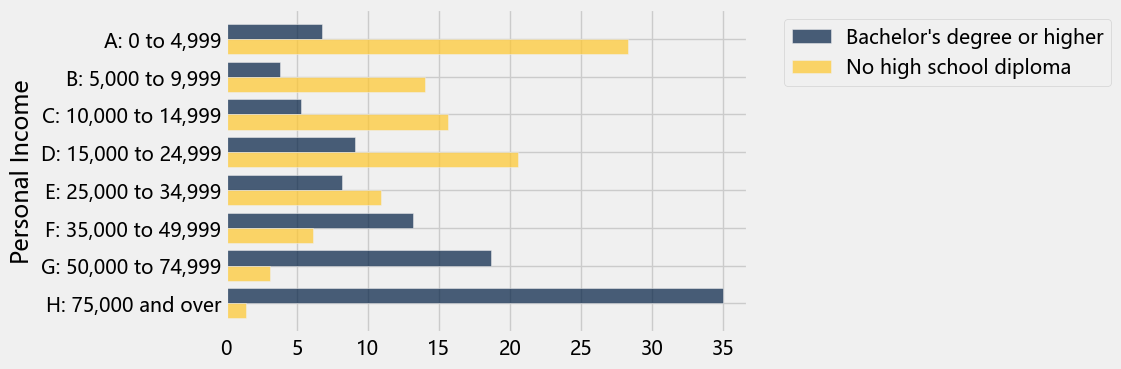

In [23]:
distribution.select(0,1,4).barh(0)

### 4. Joining Tables by Columns

In [1]:
from datascience import *
import matplotlib

matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.75)
)
cones

Flavor,Price
strawberry,3.55
vanilla,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.75


In [3]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


In [5]:
rated = cones.join('Flavor', ratings, 'Kind')
rated

Flavor,Price,Stars
chocolate,6.55,3.5
chocolate,5.75,3.5
strawberry,3.55,2.5
strawberry,5.25,2.5
vanilla,4.75,4


In [6]:
rated.with_column('$/Star', rated.column('Price')/rated.column('Stars')).sort(3)

Flavor,Price,Stars,$/Star
vanilla,4.75,4,1.1875
strawberry,3.55,2.5,1.42
chocolate,5.75,3.5,1.64286
chocolate,6.55,3.5,1.87143
strawberry,5.25,2.5,2.1


In [8]:
# The order of the arguments to `join` doesn't matter
ratings.join('Kind', cones, 'Flavor')

Kind,Stars,Price
chocolate,3.5,6.55
chocolate,3.5,5.75
strawberry,2.5,3.55
strawberry,2.5,5.25
vanilla,4,4.75


In [9]:
reviews = Table().with_columns(
    'Flavor', make_array('vanilla', 'chocolate', 'vanilla', 'chocolate'),
    'Stars', make_array(5, 3, 5, 4)
)
reviews

Flavor,Stars
vanilla,5
chocolate,3
vanilla,5
chocolate,4


In [10]:
average_review = reviews.group('Flavor', np.average)
average_review

Flavor,Stars average
chocolate,3.5
vanilla,5


In [11]:
cones.join('Flavor', average_review, 'Flavor')

Flavor,Price,Stars average
chocolate,6.55,3.5
chocolate,5.75,3.5
vanilla,4.75,5


### 5. Bike Sharing in the Bay Area

In [14]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

In [15]:
trips = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


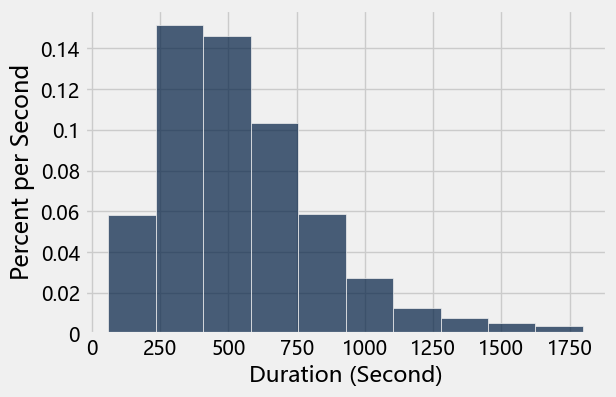

In [17]:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration', unit = 'Second')

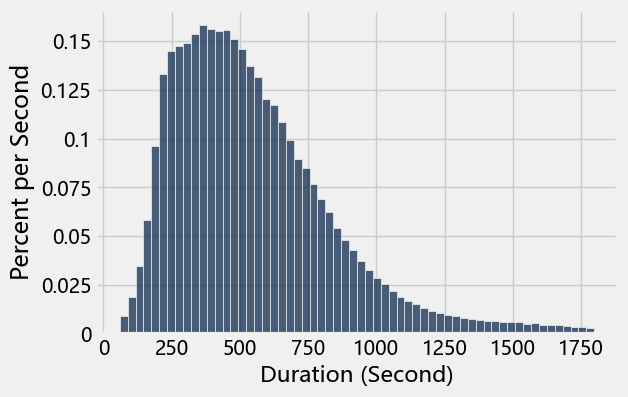

In [19]:
commute.hist('Duration', bins = 60, unit = 'Second')

In [20]:
starts = commute.group('Start Station').sort('count', descending = True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [21]:
commute.group(['Start Station', 'End Station'])

Start Station,End Station,count
2nd at Folsom,2nd at Folsom,54
2nd at Folsom,2nd at South Park,295
2nd at Folsom,2nd at Townsend,437
2nd at Folsom,5th at Howard,113
2nd at Folsom,Beale at Market,127
2nd at Folsom,Broadway St at Battery St,67
2nd at Folsom,Civic Center BART (7th at Market),47
2nd at Folsom,Clay at Battery,240
2nd at Folsom,Commercial at Montgomery,128
2nd at Folsom,Davis at Jackson,28


In [22]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
commute.pivot('Start Station', 'End Station', 'Duration', collect = min)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,61,97,164,268,0,0,271,407,0,0,483,329,306,0,494,239,262,687,599,0,0,639,416,282,80,0,0,506,237,167,250,0,0,0,0,0,0,208,264,290,0,0,0,0,0,0,0,0,0,300,303,584,0,0,0,0,0,0,0,0,590,208,0,0,318,149,448,0,429,165
2nd at South Park,61,60,77,86,0,0,78,345,0,0,290,188,171,0,357,104,81,490,341,0,0,369,278,122,60,0,0,416,142,61,68,0,0,0,0,0,0,60,237,106,0,0,0,0,0,0,0,0,0,63,66,458,0,0,0,0,0,0,0,0,399,63,0,0,79,61,78,0,270,96
2nd at Townsend,137,67,60,423,0,0,311,469,0,0,546,520,474,0,436,145,232,509,494,0,0,773,549,325,221,0,0,667,367,265,395,0,0,0,0,0,0,319,455,398,0,0,0,0,0,0,0,0,0,125,133,742,0,0,0,0,0,0,0,0,777,241,0,0,291,249,259,0,610,284
5th at Howard,215,300,384,68,0,0,357,530,0,0,179,412,364,0,543,419,359,695,609,0,0,235,474,453,145,0,0,269,161,250,306,0,0,0,0,0,0,234,89,202,0,0,0,0,0,0,0,0,0,256,221,347,0,0,0,0,0,0,0,0,375,402,0,0,455,265,357,0,553,109
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,701,387,0,0,0,0,0,0,0,0,0,229,0,0,0,0,0,0,0,441,452,318,0,0,0,0,0,309,146,182,0,207,358,876,101,0,0,369,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,305,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,526,546,0,0,0,0,0,0,0,0,0,403,0,0,0,0,0,0,0,288,875,685,0,0,0,0,0,440,420,153,0,166,624,759,116,0,0,301,0,0,0,0,0,0,0
Beale at Market,219,343,417,387,0,0,60,155,0,0,343,122,153,0,115,216,170,303,198,0,0,437,235,149,204,0,0,535,203,88,72,0,0,0,0,0,0,191,316,191,0,0,0,0,0,0,0,0,0,499,395,526,0,0,0,0,0,0,0,0,575,173,0,0,87,94,619,0,222,264
Broadway St at Battery St,351,424,499,555,0,0,195,62,0,0,520,90,129,0,70,340,284,128,101,0,0,961,148,168,357,0,0,652,351,218,221,0,0,0,0,0,0,255,376,316,0,0,0,0,0,0,0,0,0,611,599,799,0,0,0,0,0,0,0,0,738,336,0,0,169,291,885,0,134,411
California Ave Caltrain Station,0,0,0,0,0,0,0,0,82,1645,0,0,0,628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1771,0,484,131,0,0,0,0,0,0,0,1077,0,0,0,870,911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,499,0,0,0,0,0,0,0,0,0,0,0,0,201,108,0,0,0,0,0,0,0,0,0,654,0,0,0,953,696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
stations = Table.read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [27]:
Marker.map_table(stations.select('lat', 'long', 'name').relabel('name', 'labels'))

In [29]:
sf = stations.where('landmark', 'San Francisco')
sf_map_data = sf.select('lat', 'long', 'name').relabel('name', 'labels')
Circle.map_table(sf_map_data, color = 'green')

In [31]:
cities = stations.group('landmark').relabeled('landmark', 'city')
cities

city,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


In [33]:
colors = cities.with_column('color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [35]:
joined = stations.join('landmark', colors, 'city')
colored = joined.select('lat', 'long', 'name', 'color').relabel('name', 'labels')
Marker.map_table(colored)

In [36]:
starts = commute.group('Start Station').sort('count', descending = True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [38]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7841
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9274
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13674
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7394
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,522
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,590
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8135
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7460
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,300
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1137


In [46]:
starts_map_data = station_starts.select('lat', 'long', 'name').with_columns(
    'colors', 'blue',
    'areas', station_starts.column('count') * 0.3
)
starts_map_data.show(3)
Circle.map_table(starts_map_data.relabel('name', 'labels'))

lat,long,name,colors,areas
37.7853,-122.396,2nd at Folsom,blue,2352.3
37.7823,-122.393,2nd at South Park,blue,2782.2
37.7805,-122.39,2nd at Townsend,blue,4102.2
